<a href="https://colab.research.google.com/github/rafaelchourio/Deep-Learning-for-CV-Starter/blob/master/minivggnet_cifar10_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!git init 
!git clone https://github.com/rafaelchourio/Deep-Learning-for-CV-Starter.git "/content/drive/My Drive/Workspace"

Reinitialized existing Git repository in /content/.git/
Cloning into '/content/drive/My Drive/Workspace'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 85 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (85/85), done.


In [0]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from importlib.machinery import SourceFileLoader
model_module=SourceFileLoader("minivggnet","/content/drive/My Drive/Workspace/nn/convolutionals/minivggnet.py").load_module()
tracking_module=SourceFileLoader("trainingmonitor","/content/drive/My Drive/Workspace/callbacks/trainingmonitor.py").load_module()
from minivggnet import MiniVGGNet
from trainingmonitor import TrainingMonitor
import os
from google.colab import files

In [56]:
# load the training and testing data, then scale it into the range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

[INFO] loading CIFAR-10 data...


In [0]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [0]:
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
"dog", "frog", "horse", "ship", "truck"]

In [59]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])

[INFO] compiling model...


In [71]:
# construct the set of callbacks
figPath = "{}.png".format(os.getpid())
jsonPath = "{}.json".format(os.getpid())
#figPath = os.path.sep.join(["/content/drive/My Drive/Workspace/ouput","{}.png".format(os.getpid())])
#jsonPath = os.path.sep.join(["/content/drive/My Drive/Workspace/ouput", "{}.json".format(os.getpid())])
callbacks = [TrainingMonitor(figPath, jsonPath=jsonPath)]

# train the network
print("[INFO] training network...")
model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=100, callbacks=callbacks, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples


JSONDecodeError: ignored

In [18]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.85      0.81      0.83      1000
  automobile       0.93      0.89      0.91      1000
        bird       0.78      0.71      0.74      1000
         cat       0.67      0.64      0.66      1000
        deer       0.77      0.83      0.80      1000
         dog       0.73      0.76      0.75      1000
        frog       0.83      0.88      0.85      1000
       horse       0.89      0.86      0.88      1000
        ship       0.90      0.91      0.90      1000
       truck       0.86      0.89      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



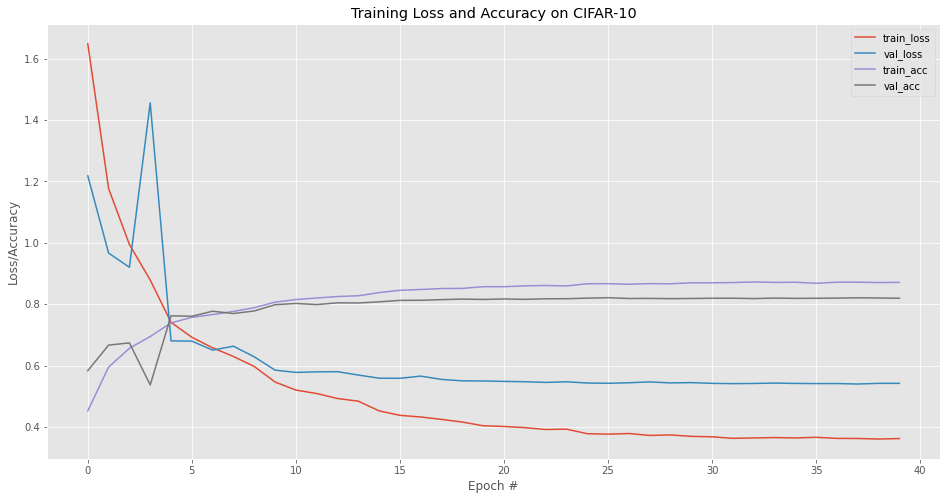

In [19]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(16,8))
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["output"])